Setups

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, feature, data, transform, filters
from skimage.util import img_as_float
from utils import plot_blobs

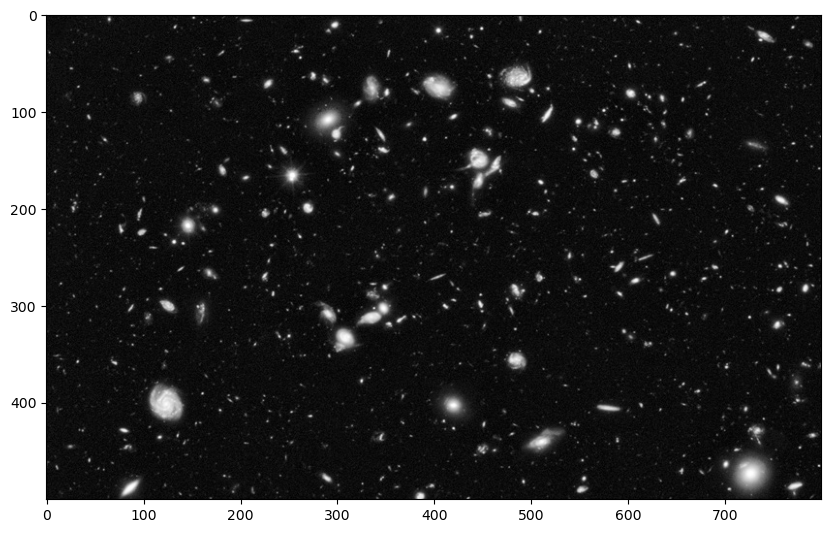

In [3]:
#load the image
image = color.rgb2gray(img_as_float(io.imread('data/resources/hubble.png')))
#plot
plt.figure(figsize=(10, 7.5))
plt.imshow(image, cmap='gray')
plt.show()

DoG

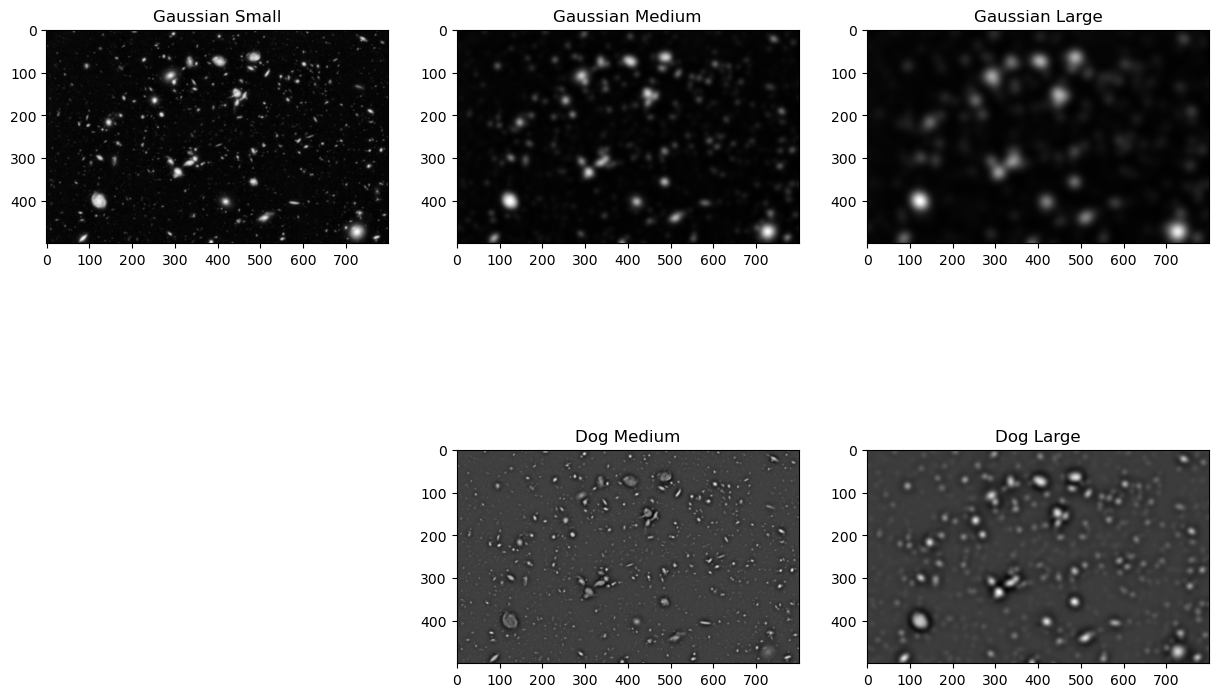

In [4]:
scales = [1, 5, 10]
#representing small, medium and large sigma
image_gauss_small = filters.gaussian(image, sigma=scales[0])
image_gauss_medium = filters.gaussian(image, sigma=scales[1])
image_gauss_large = filters.gaussian(image, sigma=scales[2])
#DoG
dog_gauss_medium = image_gauss_small - image_gauss_medium
dog_gauss_large = image_gauss_medium - image_gauss_large
#plot
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0][0].imshow(image_gauss_small, cmap='gray')
axs[0][0].set_title('Gaussian Small')
axs[0][1].imshow(image_gauss_medium, cmap='gray')
axs[0][1].set_title('Gaussian Medium')
axs[0][2].imshow(image_gauss_large, cmap='gray')
axs[0][2].set_title('Gaussian Large')
axs[1][1].imshow(dog_gauss_medium, cmap='gray')
axs[1][1].set_title('Dog Medium')
axs[1][2].imshow(dog_gauss_large, cmap='gray')
axs[1][2].set_title('Dog Large')
fig.delaxes(axs[1][0])
plt.show()

detect bolb

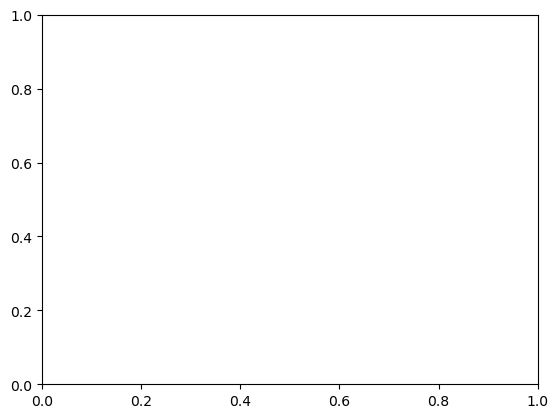

In [6]:
# Parameters
sigma_min = 1
k = 1.6
levels = 15
threshold = 0.1

def detect_blobs(image, sigma_min, k, levels, threshold):
    # 1. Define a list of sigmas
    sigmas = [sigma_min * (k ** i) for i in range(levels)]
    # 2. Compute the scale-space representation
    scale_space = np.stack([filters.gaussian(image, sigma=sigma) for sigma in sigmas], axis=-1)
    # 3. Calculate DoG-filtered images
    dog_images = scale_space[:, :, 1:] - scale_space[:, :, :-1]
    # 4. Detect peaks using peak_local_max
    peaks = feature.peak_local_max(
        dog_images,
        threshold_abs=threshold,
        footprint=np.ones((3, 3, 3)),
        exclude_border=False
    )
    # Convert peak locations to [y, x, sigma] format
    blobs = np.array([[y, x, sigmas[z]] for y, x, z in peaks])
    return blobs


# Detect blobs
blobs = detect_blobs(image, sigma_min, k, levels, threshold)

# Plot results
plot_blobs(blobs)
plt.show()